# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Read-ins" data-toc-modified-id="Read-ins-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read-ins</a></div><div class="lev1 toc-item"><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></div><div class="lev1 toc-item"><a href="#Analysis-sbi" data-toc-modified-id="Analysis-sbi-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Analysis sbi</a></div><div class="lev1 toc-item"><a href="#Analysis-rbi" data-toc-modified-id="Analysis-rbi-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analysis rbi</a></div><div class="lev1 toc-item"><a href="#Analysis-shifts" data-toc-modified-id="Analysis-shifts-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Analysis shifts</a></div><div class="lev1 toc-item"><a href="#Compare-real-errors" data-toc-modified-id="Compare-real-errors-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare real errors</a></div><div class="lev1 toc-item"><a href="#Compare-simulated-errors" data-toc-modified-id="Compare-simulated-errors-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare simulated errors</a></div><div class="lev1 toc-item"><a href="#Compare-running-time" data-toc-modified-id="Compare-running-time-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Compare running time</a></div>

# Read-ins

In [1]:
import pandas as pd
import numpy as np
from math import floor
%matplotlib notebook
import matplotlib.pyplot as plt
import glob

In [2]:
mean_bis = [1.2, 5, 15, 25, 67.5, 90]
N_bis = len(mean_bis)
track_lengths = [500, 1000, 5000]

# Functions

In [8]:
def boxplot_part(ax, track_length, plot_dict):
    # boxplot with whiskers on 5th and 95th percentile
    bp = ax.boxplot([el[1] for el in plot_dict[track_length].items()], positions=list(np.arange(1,N_bis+1)), whis=[5, 95])
    plt.setp(bp['medians'], color='k')
    ax.set_xticks(list(np.arange(1,N_bis+1)))
    ax.set_xticklabels([str(bi)+'\n({})'.format(len(plot_dict[track_length][bi])) for bi in mean_bis])
    ax.set_title('N pos = '+str(track_length))
    return

# Analysis sbi

In [2]:
summary_sbi = pd.read_csv('results_short_tracks/summaries/sbi/summary_sbi_short_tracks.csv', names=["rep", "track_length", "pingType", "mean_bi", "dist", "mean_real", "mean_est", "nb_pos", "run_time"])

In [5]:
bi_groups_sbi = summary_sbi.groupby(by=['mean_bi','track_length'])

In [7]:
real_error_dicts = {}
for TL in track_lengths:
    real_error_dicts[TL] = {}
    for bi in mean_bis:
        real_error_dicts[TL][bi] = bi_groups_sbi.get_group((bi,TL)).mean_real.dropna()

NOTE: these figures show the outliers, which are not seen on the figures in the YAPS paper. Are outliers relevant? I personally think so, they correspond with these occurences of yaps tracks that completely misfit...

In [11]:
est_error_dicts = {}
for TL in track_lengths:
    est_error_dicts[TL] = {}
    for bi in mean_bis:
        est_error_dicts[TL][bi] = bi_groups_sbi.get_group((bi,TL)).mean_est.dropna()

In [13]:
run_time_dicts = {}
for TL in track_lengths:
    run_time_dicts[TL] = {}
    for bi in mean_bis:
        run_time_dicts[TL][bi] = bi_groups_sbi.get_group((bi,TL)).run_time.dropna()

# Analysis rbi

In [15]:
summary_rbi = pd.read_csv('results_short_tracks/summaries/rbi/summary_rbi_short_tracks.csv', names=["rep", "track_length", "pingType", "mean_bi", "dist", "mean_real", "mean_est", "nb_pos", "run_time"])

In [16]:
bi_groups_rbi = summary_rbi.groupby(by=['mean_bi','track_length'])

In [18]:
real_error_dicts_rbi = {}
for TL in track_lengths:
    real_error_dicts_rbi[TL] = {}
    for bi in mean_bis:
        real_error_dicts_rbi[TL][bi] = bi_groups_rbi.get_group((bi,TL)).mean_real.dropna()

In [30]:
est_error_dicts_rbi = {}
for TL in track_lengths:
    est_error_dicts_rbi[TL] = {}
    for bi in mean_bis:
        est_error_dicts_rbi[TL][bi] = bi_groups_rbi.get_group((bi,TL)).mean_est.dropna()

In [34]:
run_time_dicts_rbi = {}
for TL in track_lengths:
    run_time_dicts_rbi[TL] = {}
    for bi in mean_bis:
        run_time_dicts_rbi[TL][bi] = bi_groups_rbi.get_group((bi,TL)).run_time.dropna()

# Analysis shifts

In [3]:
summary_shifts_sbi = pd.read_csv('results_short_tracks/summaries/sbi/summary_shifts.csv', 
                                 names=["rep", "track_length", "pingType", "mean_bi", "shift", "mean_real", "mean_est", "nb_pos", "run_time"])

In [5]:
summary_shifts_sbi.tail(100)

,rep,track_length,pingType,mean_bi,shift,mean_real,mean_est,nb_pos,run_time
1497,29,500,sbi,67.5,2.0,3.226848,5.311947,8,11.210
1498,2,500,sbi,67.5,2.0,30.162086,17.243367,8,3.371
1499,30,500,sbi,67.5,2.0,9.128777,3.552239,8,25.304
1500,3,500,sbi,67.5,2.0,10.757803,12.893510,8,13.004
1501,4,500,sbi,67.5,2.0,58.244657,19.464817,8,5.647
...,...,...,...,...,...,...,...,...,...
1592,5,500,sbi,90.0,2.0,38.762015,12.462226,6,7.886
1593,6,500,sbi,90.0,2.0,207.872272,9.002489,6,2.071
1594,7,500,sbi,90.0,2.0,12.591603,11.569054,6,1.837
1595,8,500,sbi,90.0,2.0,29.683700,16.693703,6,5.226


In [5]:
summary_shifts_sbi.groupby(by=['mean_bi','track_length']).count()

rep  pingType  shift  mean_real  mean_est  nb_pos  \
mean_bi track_length                                                      
1.2     500            90        90     90         64        64      90   
        1000           90        90     90         65        65      90   
        5000           67        67     67         33        33      67   
5.0     500            90        90     90         86        86      90   
        1000           90        90     90         90        90      90   
        5000           90        90     90         70        70      90   
15.0    500            90        90     90         90        90      90   
        1000           90        90     90         90        90      90   
        5000           90        90     90         80        80      90   
25.0    500            90        90     90         89        89      90   
        1000           90        90     90         90        90      90   
        5000           90        90     90         80        80      90   
67.5    500            90        90     90         89        89      90   
        1000           90        90     90         90        90      90   
        5000           90        90     90         85        85      90   
90.0    500            90        90     90         83        83      90   
        1000           90        90     90         89        89      90   
        5000           90        90     90         90        90      90   

                      run_time  
mean_bi track_length            
1.2     500                 90  
        1000                90  
        5000                67  
5.0     500                 90  
        1000                90  
        5000                90  
15.0    500                 90  
        1000                90  
        5000                90  
25.0    500                 90  
        1000                90  
        5000                90  
67.5    500                 90  
        1000                90  
        5000                90  
90.0    500                 90  
        1000                90  
        5000                90

In [13]:
summary_shifts_sbi[(summary_shifts_sbi.mean_bi==1.2)&(summary_shifts_sbi.track_length==500)&(summary_shifts_sbi.rep==1)]

,rep,track_length,pingType,mean_bi,shift,mean_real,mean_est,nb_pos,run_time
1067,1,500,sbi,1.2,0.5,0.189633,0.218306,416,177.162
1097,1,500,sbi,1.2,1.0,NaN,NaN,0,3.945
1127,1,500,sbi,1.2,2.0,NaN,NaN,0,1.827


In [14]:
missing = summary_shifts_sbi[(summary_shifts_sbi.mean_bi==1.2)&(summary_shifts_sbi.track_length==5000)].groupby('rep').count()

In [22]:
set(np.arange(1,31))-set(missing.index)

{3, 9, 20, 28, 29}

In [23]:
5*3+4*2

23

In [16]:
missing[missing.track_length<3]

,track_length,pingType,mean_bi,shift,mean_real,mean_est,nb_pos,run_time
rep,,,,,,,,
2,1,1,1,1,0,0,1,1
7,1,1,1,1,0,0,1,1
21,1,1,1,1,0,0,1,1
30,1,1,1,1,1,1,1,1


In [26]:
247151/3600

68.65305555555555

In [25]:
summary_shifts_sbi[(summary_shifts_sbi.mean_bi==1.2)&(summary_shifts_sbi.track_length==5000)&(summary_shifts_sbi.rep.isin([2,7,21,30]))]

,rep,track_length,pingType,mean_bi,shift,mean_real,mean_est,nb_pos,run_time
551,21,5000,sbi,1.2,0.5,NaN,NaN,0,164253.529
558,30,5000,sbi,1.2,0.5,0.593283,0.371004,4189,247151.710
580,2,5000,sbi,1.2,1.0,NaN,NaN,0,72041.757
605,7,5000,sbi,1.2,2.0,NaN,NaN,0,160.131


# Compare real errors

NOTE: these figures show the outliers, which are not seen on the figures in the YAPS paper. Are outliers relevant? I personally think so, they correspond with these occurences of yaps tracks that completely misfit...

<IPython.core.display.Javascript object>


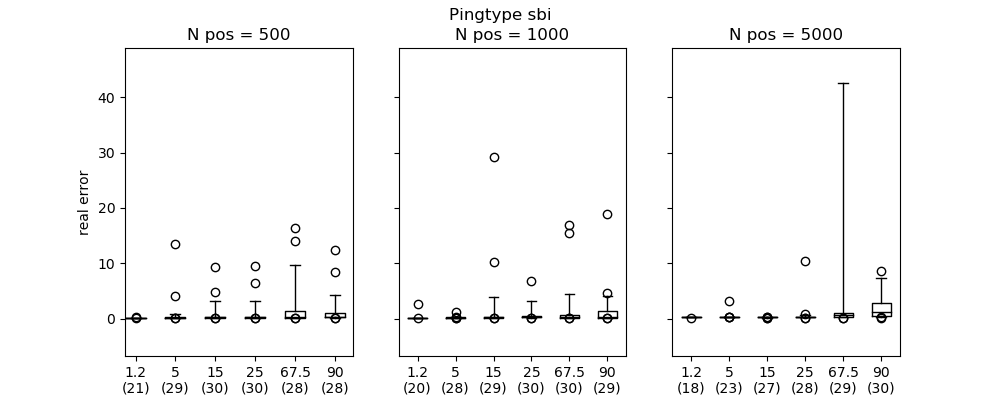

Text(0.5, 0.98, 'Pingtype sbi')

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, real_error_dicts)
boxplot_part(ax2, 1000, real_error_dicts)
boxplot_part(ax3, 5000, real_error_dicts)
ax1.set_ylabel('real error')
fig.suptitle('Pingtype sbi')

<IPython.core.display.Javascript object>


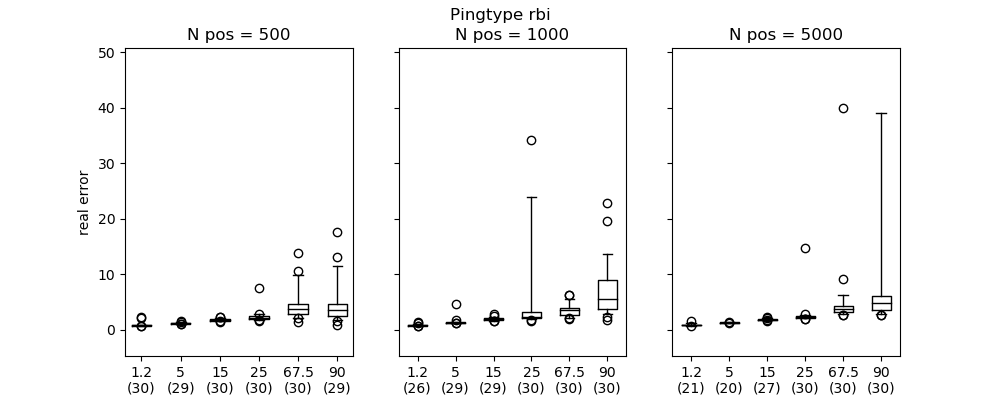

Text(0.5, 0.98, 'Pingtype rbi')

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, real_error_dicts_rbi)
boxplot_part(ax2, 1000, real_error_dicts_rbi)
boxplot_part(ax3, 5000, real_error_dicts_rbi)
ax1.set_ylabel('real error')
fig.suptitle('Pingtype rbi')

# Compare simulated errors

<IPython.core.display.Javascript object>


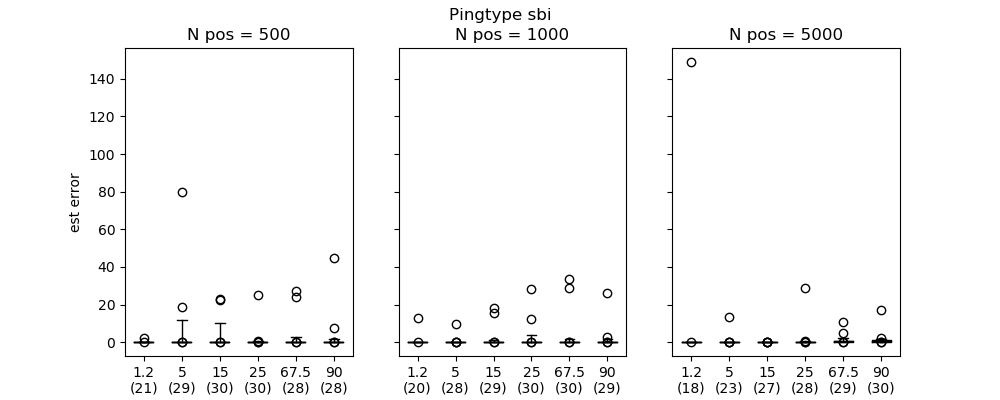

Text(0.5, 0.98, 'Pingtype sbi')

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, est_error_dicts)
boxplot_part(ax2, 1000, est_error_dicts)
boxplot_part(ax3, 5000, est_error_dicts)
ax1.set_ylabel('est error')
fig.suptitle('Pingtype sbi')

<IPython.core.display.Javascript object>


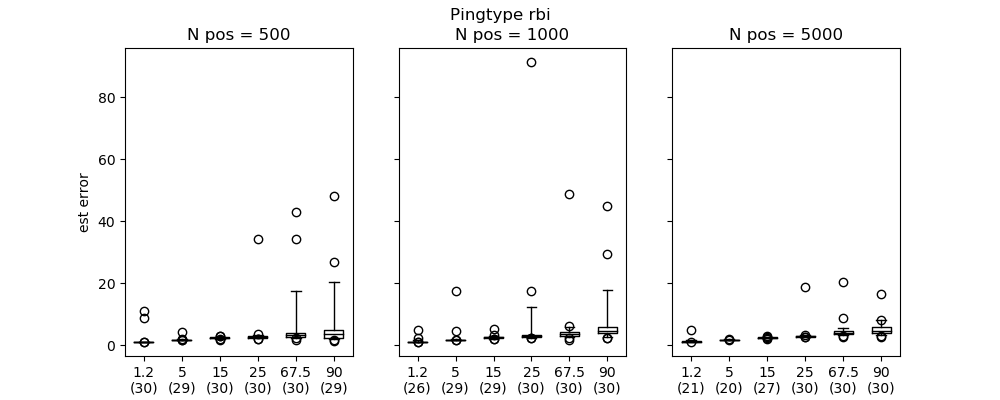

Text(0.5, 0.98, 'Pingtype rbi')

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, est_error_dicts_rbi)
boxplot_part(ax2, 1000, est_error_dicts_rbi)
boxplot_part(ax3, 5000, est_error_dicts_rbi)
ax1.set_ylabel('est error')
fig.suptitle('Pingtype rbi')

# Compare running time

<IPython.core.display.Javascript object>


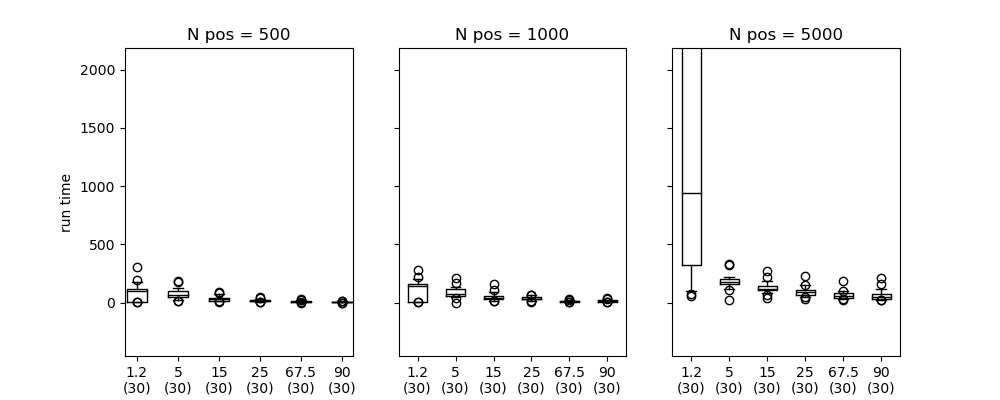

Text(0, 0.5, 'run time')

In [37]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, run_time_dicts)
boxplot_part(ax2, 1000, run_time_dicts)
boxplot_part(ax3, 5000, run_time_dicts)
ax1.set_ylabel('run time')

<IPython.core.display.Javascript object>


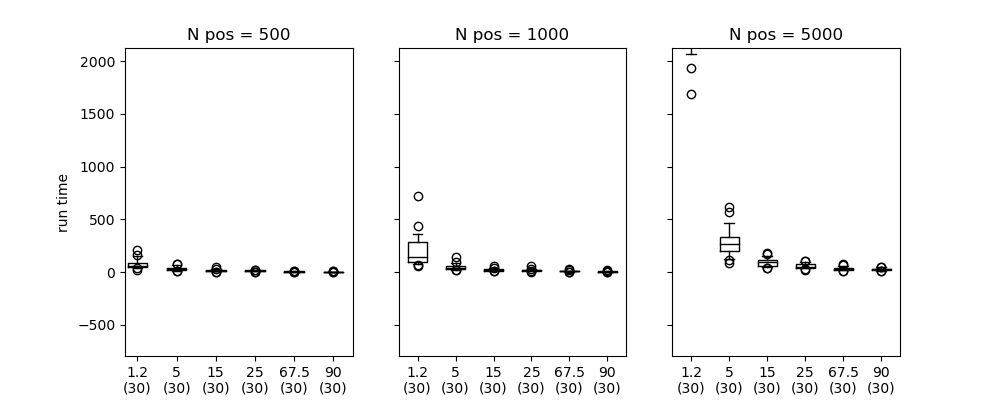

Text(0, 0.5, 'run time')

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=[10,4])
boxplot_part(ax1, 500, run_time_dicts_rbi)
boxplot_part(ax2, 1000, run_time_dicts_rbi)
boxplot_part(ax3, 5000, run_time_dicts_rbi)
ax1.set_ylabel('run time')